## Student Science Participation Analysis

## Contents:
1. Introduction
2. Objective
3. Reading the Data
4. Data Cleaning
5. Exploratory Data Analysis
6. Statistics and Machine Learning
7. Conclusion

## 1. Introduction

Lack of participation in science stream has been a serious problem with high school students of NJ.There should be an appropriate major taken to increase this participation. This project will help us estimate the no.of students participating in various science courses across New Jersey. After getting the estimate, we can easily plan how to prioritize and divide the workforce, funds to improve the situation.

## 2. Scope


The main aim of this project is to find out the counties/districts in which the enrollement of students in science stream is significantly less. And then once we have this analysis report with us, we can formulate appropriate  strategies to try and increase the participation of students in the field of science.

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats import spearmanr

## 3. Reading the Data

Now, we need to read the .csv file from its path. Then, the attributes 'CountyCode','DistrictCode' and 'SchoolCode' are of integer datatype. But, while reading the values of these attributes, we cannot retain the initial zero. So, in order to do that, we need to covert these columns into 'string' datatype. Hence, we have converted these 3 columns into 'string' or 'object type.

In [8]:
df =pd.read_csv(r'C:\Users\Owner\Desktop\IDS\ScienceCourseParticipation.csv')
df.columns=['CountyCode','CountyName','DistrictCode','DistrictName','SchoolCode','SchoolName','Grade','Biology','Chemistry','EarthandSpaceScience','EnvironmentalScience','Physics','OtherScience'
]
df
        

,CountyCode,CountyName,DistrictCode,DistrictName,SchoolCode,SchoolName,Grade,Biology,Chemistry,EarthandSpaceScience,EnvironmentalScience,Physics,OtherScience
0,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,9,306,12,11,137,3,26
1,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,10,135,177,17,47,4,29
2,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,11,33,76,16,58,94,84
3,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,12,23,15,17,30,70,33
4,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,Total,497,280,61,272,171,172
5,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,Enrolled in AP/IB Course,26,10,0,50,25,0
6,1,ATLANTIC,110,ATLANTIC CITY,10,ATLANTIC CITY HIGH SCHOOL,Enrolled in Dual Enrollment Course,0,0,0,0,0,0
7,1,ATLANTIC,120,ATLANTIC CO VOCATIONAL,10,ATLANTIC COUNTY INSTITUTE OF TECHNOLOGY,9,117,0,0,0,292,25
8,1,ATLANTIC,120,ATLANTIC CO VOCATIONAL,10,ATLANTIC COUNTY INSTITUTE OF TECHNOLOGY,10,0,377,0,0,6,60
9,1,ATLANTIC,120,ATLANTIC CO VOCATIONAL,10,ATLANTIC COUNTY INSTITUTE OF TECHNOLOGY,11,296,10,0,0,45,13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
CountyCode              3068 non-null int64
CountyName              3068 non-null object
DistrictCode            3068 non-null int64
DistrictName            3068 non-null object
SchoolCode              3068 non-null int64
SchoolName              3068 non-null object
Grade                   3068 non-null object
Biology                 3068 non-null object
Chemistry               3068 non-null object
EarthandSpaceScience    3068 non-null object
EnvironmentalScience    3068 non-null object
Physics                 3068 non-null object
OtherScience            3068 non-null object
dtypes: int64(3), object(10)
memory usage: 311.7+ KB


## 4. Data Cleaning

In [10]:
df['Biology'] = df['Biology'].replace('N', 0)
df['Biology'] = df['Biology'].replace('**', 0)
df['Biology'] = df['Biology'].replace('*', 0)
df['Chemistry'] = df['Chemistry'].replace('N', 0)
df['Chemistry'] = df['Chemistry'].replace('**', 0)
df['Chemistry'] = df['Chemistry'].replace('*', 0)
df['EarthandSpaceScience'] = df['EarthandSpaceScience'].replace('N', 0)
df['EarthandSpaceScience'] = df['EarthandSpaceScience'].replace('**', 0)
df['EarthandSpaceScience'] = df['EarthandSpaceScience'].replace('*', 0)
df['EnvironmentalScience'] = df['EnvironmentalScience'].replace('N', 0)
df['EnvironmentalScience'] = df['EnvironmentalScience'].replace('**', 0)
df['EnvironmentalScience'] = df['EnvironmentalScience'].replace('*', 0)
df['Physics'] = df['Physics'].replace('N', 0)
df['Physics'] = df['Physics'].replace('**', 0)
df['Physics'] = df['Physics'].replace('*', 0)
df['OtherScience'] = df['OtherScience'].replace('N', 0)
df['OtherScience'] = df['OtherScience'].replace('**', 0)
df['OtherScience'] = df['OtherScience'].replace('*', 0)

In [11]:
df['Biology'] = df['Biology'].astype(int)
df['Chemistry'] = df['Chemistry'].astype(int)
df['EarthandSpaceScience'] = df['EarthandSpaceScience'].astype(int)
df['Physics'] = df['Physics'].astype(int)
df['OtherScience'] = df['OtherScience'].astype(int)
df['EnvironmentalScience'] = df['EnvironmentalScience'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
CountyCode              3068 non-null int64
CountyName              3068 non-null object
DistrictCode            3068 non-null int64
DistrictName            3068 non-null object
SchoolCode              3068 non-null int64
SchoolName              3068 non-null object
Grade                   3068 non-null object
Biology                 3068 non-null int32
Chemistry               3068 non-null int32
EarthandSpaceScience    3068 non-null int32
EnvironmentalScience    3068 non-null int32
Physics                 3068 non-null int32
OtherScience            3068 non-null int32
dtypes: int32(6), int64(3), object(4)
memory usage: 239.8+ KB


In [13]:
df.isnull().sum()

CountyCode              0
CountyName              0
DistrictCode            0
DistrictName            0
SchoolCode              0
SchoolName              0
Grade                   0
Biology                 0
Chemistry               0
EarthandSpaceScience    0
EnvironmentalScience    0
Physics                 0
OtherScience            0
dtype: int64

In [14]:
df['county_and_district_and_school_code'] = df['CountyCode'] + df['DistrictCode']+df['SchoolCode']
print(df)

      CountyCode CountyName  DistrictCode                 DistrictName  \
0              1   ATLANTIC           110                ATLANTIC CITY   
1              1   ATLANTIC           110                ATLANTIC CITY   
2              1   ATLANTIC           110                ATLANTIC CITY   
3              1   ATLANTIC           110                ATLANTIC CITY   
4              1   ATLANTIC           110                ATLANTIC CITY   
5              1   ATLANTIC           110                ATLANTIC CITY   
6              1   ATLANTIC           110                ATLANTIC CITY   
7              1   ATLANTIC           120       ATLANTIC CO VOCATIONAL   
8              1   ATLANTIC           120       ATLANTIC CO VOCATIONAL   
9              1   ATLANTIC           120       ATLANTIC CO VOCATIONAL   
10             1   ATLANTIC           120       ATLANTIC CO VOCATIONAL   
11             1   ATLANTIC           120       ATLANTIC CO VOCATIONAL   
12             1   ATLANTIC           

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 14 columns):
CountyCode                             3068 non-null int64
CountyName                             3068 non-null object
DistrictCode                           3068 non-null int64
DistrictName                           3068 non-null object
SchoolCode                             3068 non-null int64
SchoolName                             3068 non-null object
Grade                                  3068 non-null object
Biology                                3068 non-null int32
Chemistry                              3068 non-null int32
EarthandSpaceScience                   3068 non-null int32
EnvironmentalScience                   3068 non-null int32
Physics                                3068 non-null int32
OtherScience                           3068 non-null int32
county_and_district_and_school_code    3068 non-null int64
dtypes: int32(6), int64(4), object(4)
memory usage: 263.7+ KB


In [16]:
df_1 = df.drop(['CountyCode', 'DistrictCode','SchoolCode','CountyName','DistrictName','SchoolName'],axis=1)

In [17]:
df_1.head()

,Grade,Biology,Chemistry,EarthandSpaceScience,EnvironmentalScience,Physics,OtherScience,county_and_district_and_school_code
0,9,306,12,11,137,3,26,121
1,10,135,177,17,47,4,29,121
2,11,33,76,16,58,94,84,121
3,12,23,15,17,30,70,33,121
4,Total,497,280,61,272,171,172,121


## 5. Exploratory Data Analysis

In [18]:
df_1=df_1[df_1.Grade!='Total']

In [19]:
df_group=df_1.groupby(['county_and_district_and_school_code','Grade']).agg({'Biology':sum,'Chemistry':sum,'EarthandSpaceScience':sum,'Physics':sum,'OtherScience':sum,'EnvironmentalScience':sum})

In [17]:
df_group

Biology  \
county_and_district_and_school_code Grade                                         
121                                 10                                      135   
                                    11                                       33   
                                    12                                       23   
                                    9                                       306   
                                    Enrolled in AP/IB Course                 26   
...                                                                         ...   
9130                                11                                        6   
                                    12                                        0   
                                    9                                        11   
                                    Enrolled in AP/IB Course                  0   
                                    Enrolled in Dual Enrollment Course        0   

                                                                        Chemistry  \
county_and_district_and_school_code Grade                                           
121                                 10                                        177   
                                    11                                         76   
                                    12                                         15   
                                    9                                          12   
                                    Enrolled in AP/IB Course                   10   
...                                                                           ...   
9130                                11                                         88   
                                    12                                         11   
                                    9                                           0   
                                    Enrolled in AP/IB Course                    0   
                                    Enrolled in Dual Enrollment Course          0   

                                                                        EarthandSpaceScience  \
county_and_district_and_school_code Grade                                                      
121                                 10                                                    17   
                                    11                                                    16   
                                    12                                                    17   
                                    9                                                     11   
                                    Enrolled in AP/IB Course                               0   
...                                                                                      ...   
9130                                11                                                     0   
                                    12                                                     0   
                                    9                                                      0   
                                    Enrolled in AP/IB Course                               0   
                                    Enrolled in Dual Enrollment Course                     0   

                                                                        Physics  \
county_and_district_and_school_code Grade                                         
121                                 10                                        4   
                                    11                                       94   
                                    12                                       70   
                                    9                                         3   
                                    Enrolled in AP/IB Course                 25   
...                                                     

In [20]:
df_group_1=df_group.stack()

In [21]:
df_group_1

county_and_district_and_school_code  Grade                                                   
121                                  10                                  Biology                 135
                                                                         Chemistry               177
                                                                         EarthandSpaceScience     17
                                                                         Physics                   4
                                                                         OtherScience             29
                                                                         EnvironmentalScience     47
                                     11                                  Biology                  33
                                                                         Chemistry                76
                                                                         EarthandSpaceScience     

In [22]:
df_group.max(level=['county_and_district_and_school_code'])

,Biology,Chemistry,EarthandSpaceScience,Physics,OtherScience,EnvironmentalScience
county_and_district_and_school_code,,,,,,
121,306,177,17,94,84,137
131,296,377,0,292,60,0
135,70,21,0,0,23,97
167,108,121,0,17,38,137
244,174,151,0,87,89,187
247,0,0,0,0,0,0
257,680,585,0,200,94,184
283,333,231,0,85,95,145
313,292,384,14,469,132,43


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002287A44BF48>,
      dtype=object)

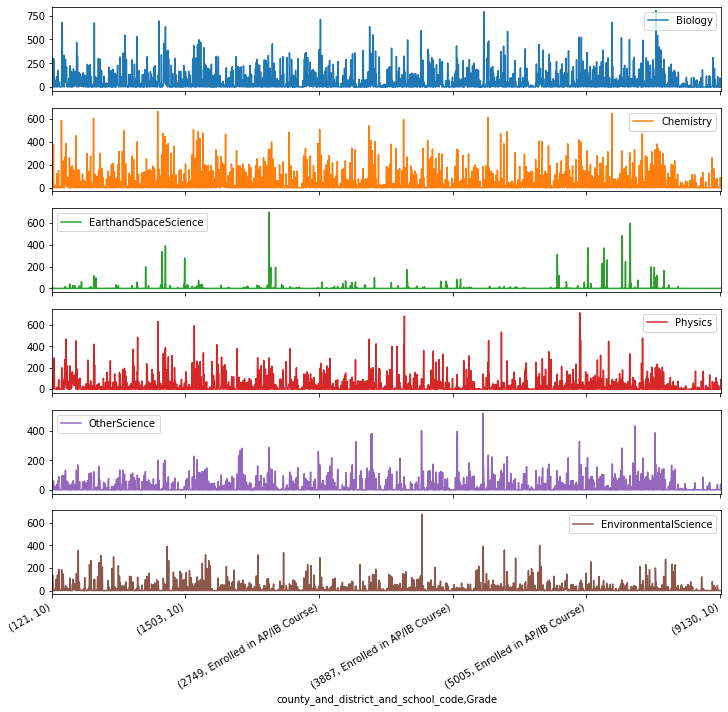

In [52]:
df_group.plot(figsize=(12,12), subplots=True)

In [24]:
df_group_1=df_group[(df_group['Biology']>25) & (df_group['Chemistry']>25) & (df_group['EarthandSpaceScience']>25) & (df_group['Physics']>25) & (df_group['OtherScience']>25) & (df_group['EnvironmentalScience']>25)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B777A45CF8>,
      dtype=object)

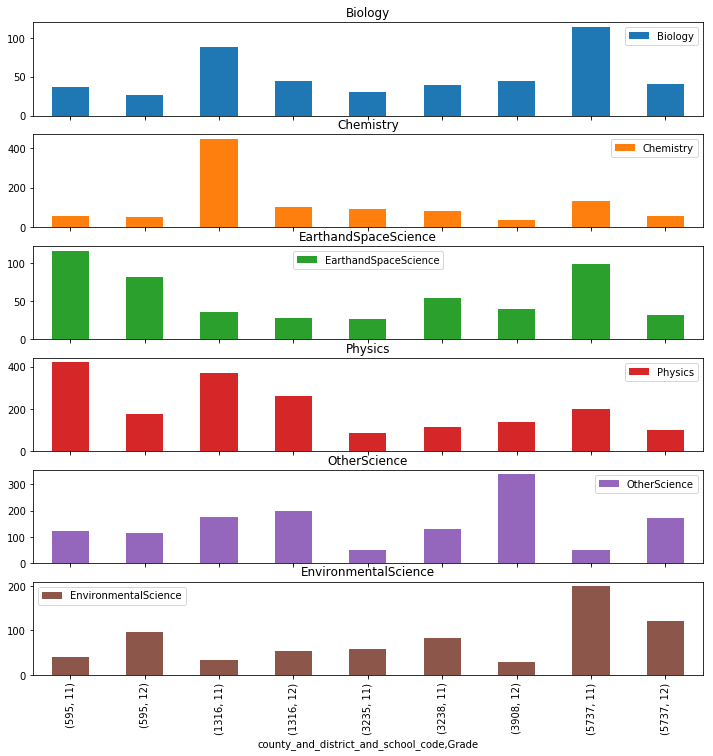

In [25]:
df_group_1.plot(figsize=(12,12),kind='bar',subplots=True)

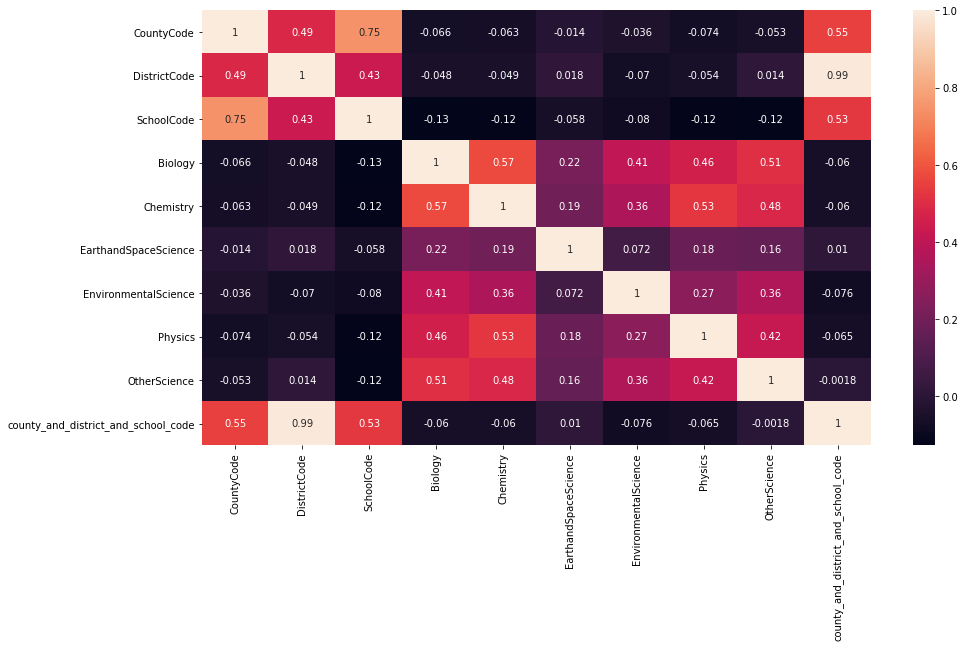

In [54]:
a1=df.select_dtypes(include="object").columns
a2=df.select_dtypes(exclude="object").columns
sb.heatmap(dfcor, 
        xticklabels=dfcor.columns,
        yticklabels=dfcor.columns,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

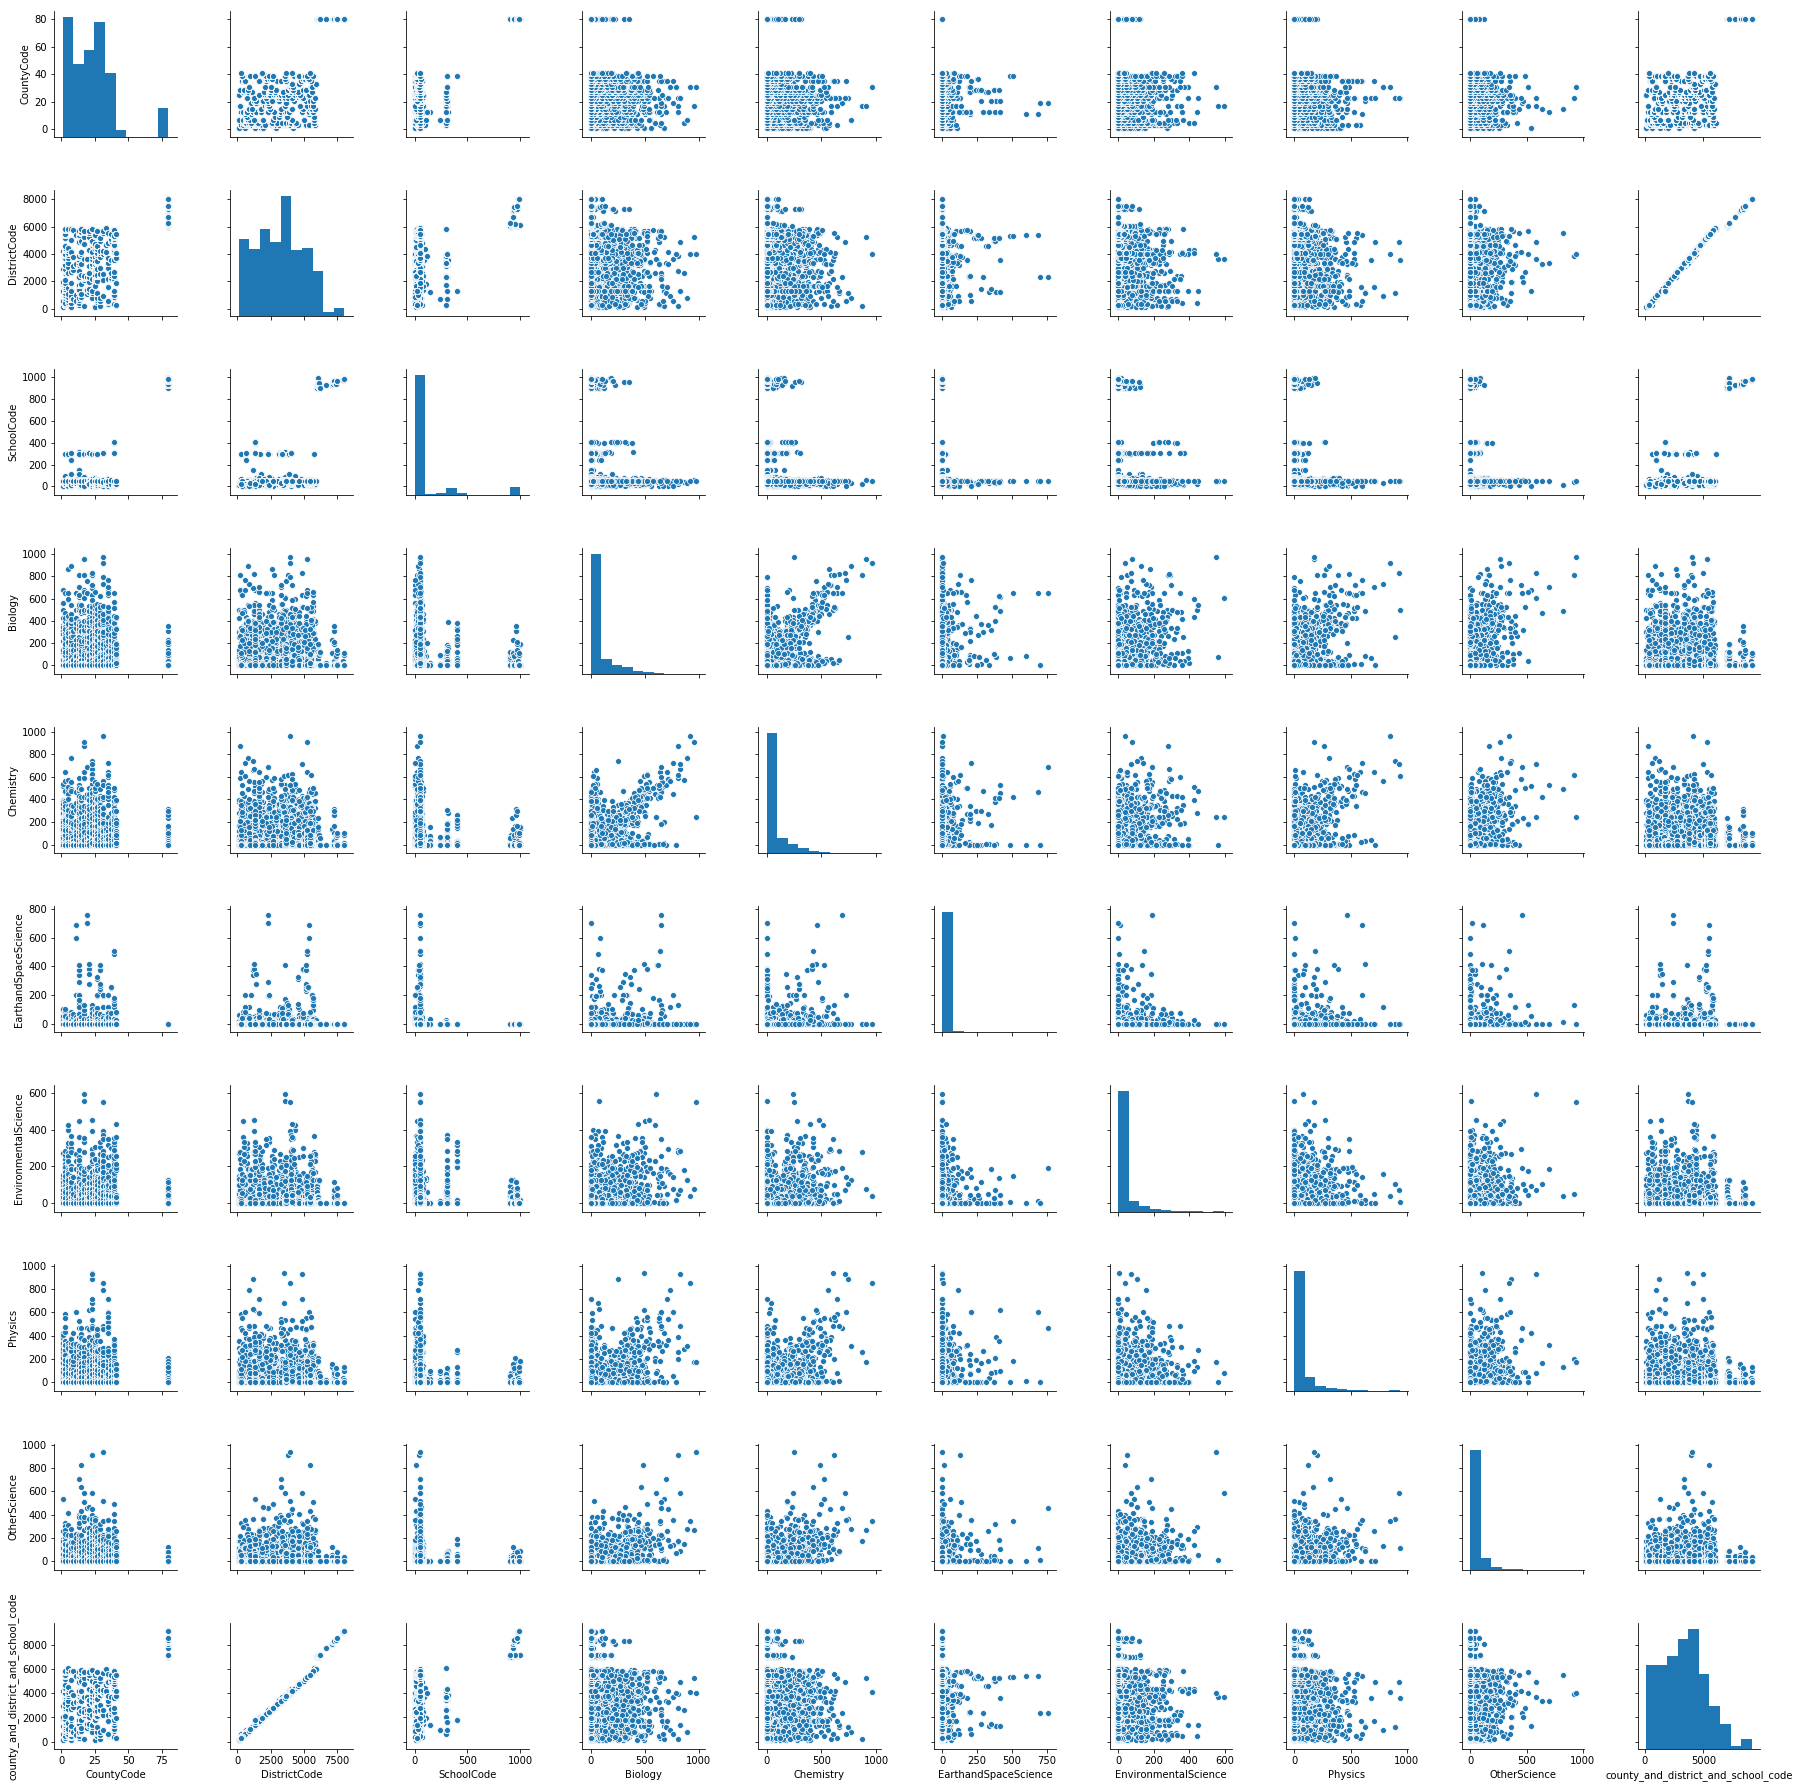

In [30]:
sb.pairplot(df)

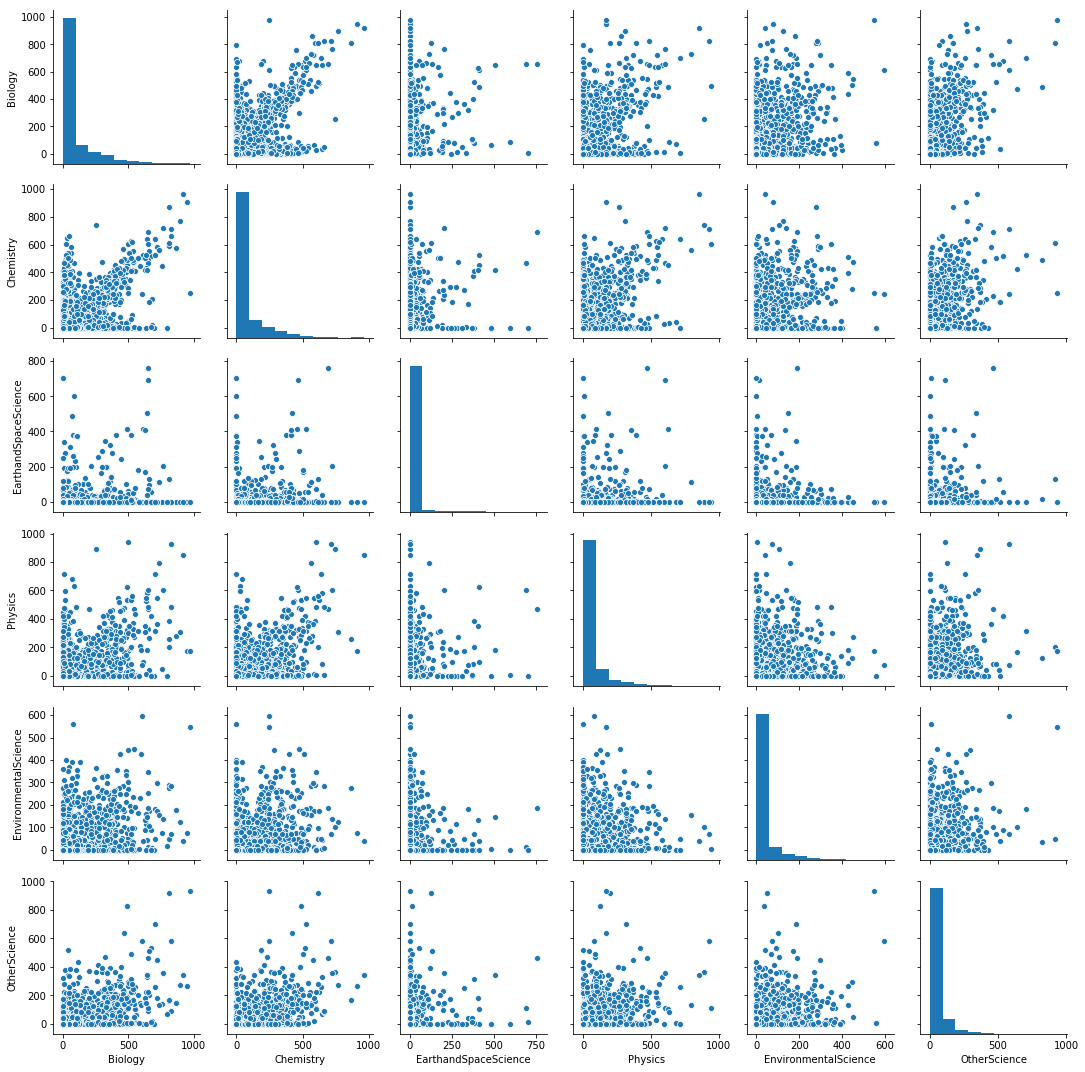

In [32]:
x=df[['Biology','Chemistry','EarthandSpaceScience','Physics','EnvironmentalScience','OtherScience']]
sb.pairplot(x)

## 6. Statistics and Machine Learning

## Spearman Rank Correlation
**The Spearman’s Rank Correlation Coefficient is the non-parametric statistical measure used to study the strength of association between the two ranked variables. This method is applied to the ordinal set of numbers, which can be arranged in order, i.e. one after the other so that ranks can be given to each.**

In [39]:
bio=df['Biology']
cm=df['Chemistry']
es=df['EarthandSpaceScience']
en=df['EnvironmentalScience']
ph=df['Physics']
os=df['OtherScience']

In [34]:
spearmanr_coefficient, p_value= spearmanr(bio, cm)
print("Spearman Rank Correlation Coefficient %3.3f" %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.513


In [35]:
spearmanr_coefficient, p_value= spearmanr(bio, es)
print("Spearman Rank Correlation Coefficient %3.3f" %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.246


In [28]:
spearmanr_coefficient, p_value= spearmanr(bio, en)
print("Spearman Rank Correlation Coefficient %3.3f" %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.464


In [76]:
spearmanr_coefficient, p_value= spearmanr(bio, ph)
print("Spearman Rank Correlation Coefficient %3.3f" %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.419


In [29]:
spearmanr_coefficient, p_value= spearmanr(bio, os)
print("Spearman Rank Correlation Coefficient %3.3f" %(spearmanr_coefficient))

Spearman Rank Correlation Coefficient 0.467


In [38]:
bio.describe()

count    3068.000000
mean       81.800196
std       136.519306
min         0.000000
25%         1.000000
50%        21.000000
75%        94.000000
max       976.000000
Name: Biology, dtype: float64

In [40]:
cm.describe()

count    3068.000000
mean       68.731421
std       119.275053
min         0.000000
25%         0.000000
50%        14.000000
75%        79.000000
max       962.000000
Name: Chemistry, dtype: float64

In [41]:
es.describe()

count    3068.000000
mean        7.457953
std        42.225479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       758.000000
Name: EarthandSpaceScience, dtype: float64

In [42]:
en.describe()

count    3068.000000
mean       29.640482
std        60.984603
min         0.000000
25%         0.000000
50%         2.000000
75%        31.000000
max       594.000000
Name: EnvironmentalScience, dtype: float64

In [43]:
ph.describe()

count    3068.000000
mean       49.708605
std        97.128209
min         0.000000
25%         0.000000
50%         7.000000
75%        57.000000
max       938.000000
Name: Physics, dtype: float64

In [44]:
os.describe()

count    3068.000000
mean       34.336050
std        72.538225
min         0.000000
25%         0.000000
50%         1.000000
75%        39.000000
max       936.000000
Name: OtherScience, dtype: float64

## Chi-square test
**The Chi-Square Test is the widely used non-parametric statistical test that describes the magnitude of discrepancy between the observed data and the data expected to be obtained with a specific hypothesis.**

In [30]:
table = pd.crosstab(bio,cm)

import scipy
from scipy.stats import chi2_contingency

chi2, p, dof, expected=chi2_contingency(table.values)



In [31]:
print("Chi-square Statistics %0.3f p_value %3.3f",(chi2, p))

Chi-square Statistics %0.3f p_value %3.3f (417771.50486431614, 0.0)


In [32]:
table = pd.crosstab(bio,es)

import scipy
from scipy.stats import chi2_contingency

chi2, p, dof, expected=chi2_contingency(table.values)

print ("Chi-square Statistics %0.3f p_value %0.3f",(chi2, p))

Chi-square Statistics %0.3f p_value %0.3f (131110.19791418876, 0.0)


In [33]:
table = pd.crosstab(bio,en)

import scipy
from scipy.stats import chi2_contingency

chi2, p, dof, expected=chi2_contingency(table.values)

print ("Chi-square Statistics %0.3f p_value %0.3f",(chi2, p))

Chi-square Statistics %0.3f p_value %0.3f (245528.85058837823, 0.0)


In [34]:
table = pd.crosstab(bio,ph)

import scipy
from scipy.stats import chi2_contingency

chi2, p, dof, expected=chi2_contingency(table.values)

print ("Chi-square Statistics %0.3f p_value %0.3f",(chi2, p))

Chi-square Statistics %0.3f p_value %0.3f (323572.59943121765, 0.0)


In [35]:
table = pd.crosstab(bio,os)

import scipy
from scipy.stats import chi2_contingency

chi2, p, dof, expected=chi2_contingency(table.values)

print ("Chi-square Statistics %0.3f p_value %0.3f",(chi2, p))

Chi-square Statistics %0.3f p_value %0.3f (280841.42261810997, 0.0)


In [36]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind

## Linear Regression
In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable

In [48]:
#liner regression
import statsmodels.formula.api as smf

lm= smf.ols(formula='Biology ~ Chemistry', data=df).fit()

print("Coefficient: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

Coefficient: 

 Intercept    36.640156
Chemistry     0.657051
dtype: float64

 Pvalues: 

 Intercept     1.163841e-53
Chemistry    1.691532e-268
dtype: float64

 R Squared: 

 0.32954071528867257


## Multiple Linear Regression
There is a linear relationship between the dependent variables and the independent variables.The independent variables are not too highly correlated with each other.

In [49]:
#Multiple linear regression variable
lm= smf.ols(formula='Biology ~ Chemistry + EarthandSpaceScience + Physics + OtherScience + EnvironmentalScience',data=df).fit()

print("Coefficient: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

print(lm.summary())

Coefficient: 

 Intercept               19.619209
Chemistry                0.365171
EarthandSpaceScience     0.274788
Physics                  0.185145
OtherScience             0.417046
EnvironmentalScience     0.388315
dtype: float64

 Pvalues: 

 Intercept               2.810535e-18
Chemistry               6.392588e-73
EarthandSpaceScience    8.393483e-10
Physics                 1.116353e-15
OtherScience            2.155209e-41
EnvironmentalScience    6.143040e-31
dtype: float64

 R Squared: 

 0.445757768467126
                            OLS Regression Results                            
Dep. Variable:                Biology   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     492.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:02:11   Log-Likelihood:                -18531.
No. Ob

In [48]:
dfcor=df.corr()
print(dfcor)

                                     CountyCode  DistrictCode  SchoolCode  \
CountyCode                             1.000000      0.485723    0.746254   
DistrictCode                           0.485723      1.000000    0.434062   
SchoolCode                             0.746254      0.434062    1.000000   
Biology                               -0.066189     -0.047553   -0.126632   
Chemistry                             -0.062503     -0.048820   -0.118556   
EarthandSpaceScience                  -0.014323      0.018325   -0.057531   
EnvironmentalScience                  -0.035655     -0.070209   -0.079658   
Physics                               -0.073723     -0.053518   -0.119625   
OtherScience                          -0.052954      0.014044   -0.124329   
county_and_district_and_school_code    0.552639      0.993808    0.531312   

                                      Biology  Chemistry  \
CountyCode                          -0.066189  -0.062503   
DistrictCode                    

## 7. Conclusion

From the exploratory data analysis, we can conclude that the participation of students in the "Environmental Science" and "Earth and Space Science" is significantly less as compared to the other branches i.e. Physics, Chemistry, Biology and Other Science.